# Thompson Sampling

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [2]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing Thompson Sampling

In [3]:
import random
ads_selected = []
numbers_of_rewards_1 = [0] * len(dataset.columns)
numbers_of_rewards_0 = [0] * len(dataset.columns)
total_reward = 0
for i in range(len(dataset.values)):
    chosen_ad = 0
    max_random = 0
    for j in range(len(dataset.values[i])):
        random_beta = random.betavariate(numbers_of_rewards_1[j] + 1, numbers_of_rewards_0[j] + 1)
        if random_beta > max_random:
            max_random = random_beta
            chosen_ad = j
    ads_selected.append(chosen_ad)
    if dataset.values[i][chosen_ad] == 1:
        numbers_of_rewards_1[chosen_ad] += 1
    else:
        numbers_of_rewards_0[chosen_ad] += 1
    total_reward += dataset.values[i][chosen_ad]

## Visualising the results - Histogram

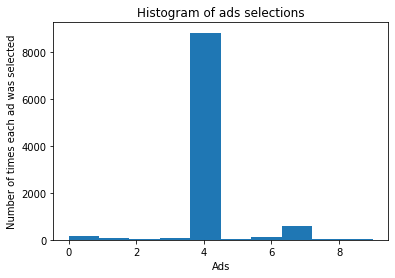

In [4]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()